# W Plot example

We demostrate an use of the validphys API directly in Python without going through the reportengine loop.

We produce a scatter plot of the predictions for $W^+$ vs $W^-$ cross sections for each replica in NNPDF 4.0 and 3.1, and compare the result with the experimental error.

In [1]:
from validphys.loader import Loader
from validphys.core import DataSetSpec, PDF, PDFSETS
from validphys.api import API

In [2]:
l = Loader()
thno = 40_000_000
dsname = 'ATLAS_WPWM_13TEV_TOT'
cfactors = ['NRM',]
pdfs = ['NNPDF31_nnlo_as_0118', 'NNPDF40_nnlo_as_01180']
inp = {
    'pdfs': pdfs,
    'dataset_input': {'dataset': dsname, 'cfac': cfactors},   'theoryid': thno,
    'use_cuts': 'internal'
}

In [3]:
ds = API.dataset(**inp)
resd, res31, res40 = API.one_or_more_results(**inp)

LHAPDF 6.5.5 loading all 101 PDFs in set NNPDF31_nnlo_as_0118
NNPDF31_nnlo_as_0118, version 1; 101 PDF members
LHAPDF 6.5.5 loading all 101 PDFs in set NNPDF40_nnlo_as_01180
NNPDF40_nnlo_as_01180, version 1; 101 PDF members


In [4]:
info = ds.commondata.metadata.plotting

In [5]:
info.y_label

'$\\sigma^{fid}$ (fb)'

In [6]:
xlabel, ylabel, *_ = info.extra_labels[' ']
units = info.y_label

In [7]:
info.extra_labels

{' ': ['$W^-$', '$W^+$'], 'boson': ['W', 'W']}

In [8]:
units

'$\\sigma^{fid}$ (fb)'

In [9]:
import numpy as np
import numpy.linalg as la

In [10]:
cov = resd.covmat[:2,:2]
cov

array([[9.9000e+09, 1.2859e+10],
       [1.2859e+10, 1.8200e+10]])

In [11]:
vals, vects = la.eigh(cov)

In [12]:
vals = np.sqrt(vals)

In [13]:
cov

array([[9.9000e+09, 1.2859e+10],
       [1.2859e+10, 1.8200e+10]])

In [14]:
cv = resd.central_value

In [15]:
%matplotlib inline

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [17]:
vects

array([[-0.80843445,  0.58858622],
       [ 0.58858622,  0.80843445]])

In [18]:
vals, vects = la.eigh(resd.covmat)

In [19]:
vals = np.sqrt(vals)

In [20]:
res40.central_value

array([3569331.08455767, 4673727.19222851])

<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:46: SyntaxWarning: invalid escape sequence '\p'
/var/folders/8y/wkh12jl11490w452ckdjgktw0000gn/T/ipykernel_75093/1516653472.py:37: SyntaxWarning: invalid escape sequence '\s'
  el1s.set(label = "$1 \sigma$")
/var/folders/8y/wkh12jl11490w452ckdjgktw0000gn/T/ipykernel_75093/1516653472.py:46: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title("$W^{\pm}$ (NNLO)")


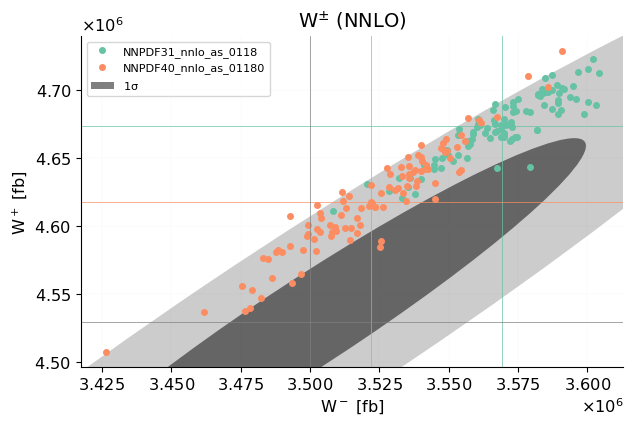

In [21]:
from validphys.app import app
from validphys import mplstyles

plt.style.use(str(mplstyles.smallstyle))

angle = np.arctan2(vects[0,1], vects[0,0])*180/np.pi

el1s = Ellipse(xy=cv, angle=angle, width=2*vals[0], height=2*vals[1], zorder=1)
el2s = Ellipse(xy=cv, angle=angle, width=4*vals[0], height=4*vals[1], zorder=1)

#fig = plt.figure(0)
#ax = fig.add_subplot(111, aspect='equal')

fig, ax = plt.subplots()

color30 = ax._get_lines.get_next_color()
color31 = ax._get_lines.get_next_color()

ax.plot(*res40.rawdata, 'o', label=pdfs[0], color=color30)
ax.plot(*res31.rawdata, 'o', label=pdfs[1], color=color31)

ax.axvline(res40.central_value[0], color=color30, linewidth=0.5)
ax.axhline(res40.central_value[1], color=color30,linewidth=0.5)

ax.axvline(res31.central_value[0], color=color31,linewidth=0.5)
ax.axhline(res31.central_value[1], color=color31,linewidth=0.5)

ax.axvline(resd.central_value[0], color='grey',linewidth=0.5)
ax.axhline(resd.central_value[1], color='grey',linewidth=0.5)


ax.add_artist(el1s)
ax.add_artist(el2s)

el1s.set_facecolor('black')
el1s.set_alpha(0.5)
el1s.set(label = "$1 \sigma$")

el2s.set_facecolor('black')
el2s.set_alpha(0.2)

ax.set_xlabel("%s [fb]"%xlabel)
ax.set_ylabel("%s [fb]"%ylabel)

ax.set_axisbelow(True)
ax.set_title("$W^{\pm}$ (NNLO)")
ax.legend()

In [22]:
fig.savefig("wabs.pdf")